In [1]:
#importing all libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
df = pd.read_csv(r'/content/sample_data/tested.csv')


In [8]:
df.shape

(418, 12)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df.count()

,0
PassengerId,418
Survived,418
Pclass,418
Name,418
Sex,418
Age,332
SibSp,418
Parch,418
Ticket,418
Fare,417


In [11]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [19]:
# Fill missing values for Age to avoid errors in visualization
df['Age'].fillna(df['Age'].median(), inplace=True)

In [17]:
df.drop('Cabin',axis = 1,inplace=True)

In [28]:
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# **DATA VISUALIZATION**

<Axes: ylabel='Density'>

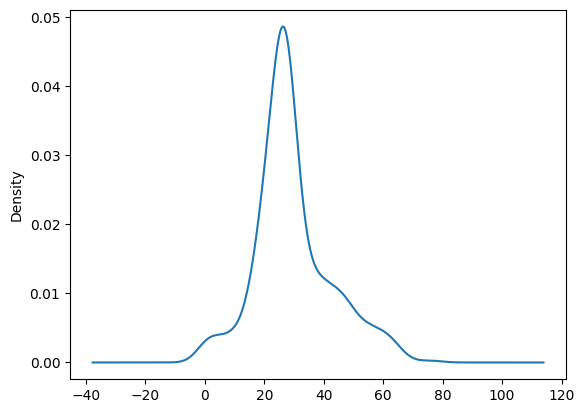

In [30]:
df.Age.plot(kind = 'kde')

In [31]:

df.Age.median()

27.0

In [32]:
df.Survived


,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [33]:
df.Survived.value_counts()

,count
Survived,
0,266
1,152


<Axes: ylabel='count'>

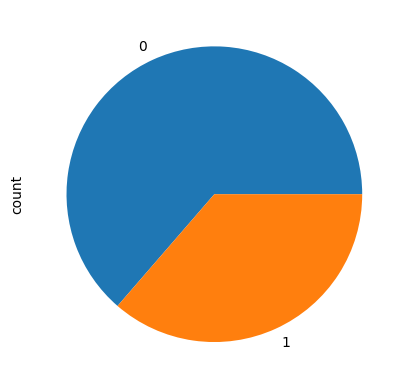

In [34]:
df.Survived.value_counts().plot(kind = 'pie')

In [35]:

sns.set(style="whitegrid")


<ipython-input-36-0fc93242a168>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='coolwarm')


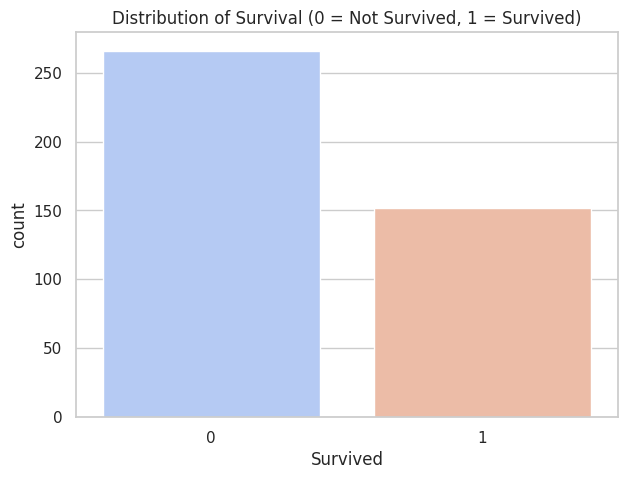

In [36]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title('Distribution of Survival (0 = Not Survived, 1 = Survived)')
plt.show()


<Axes: xlabel='Pclass', ylabel='count'>

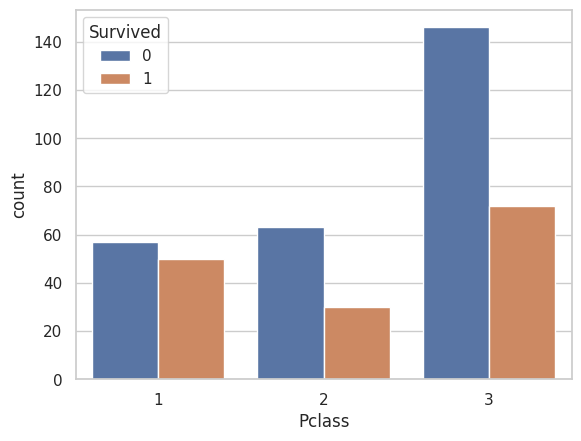

In [37]:
sns.countplot( df,x='Pclass',hue = 'Survived')

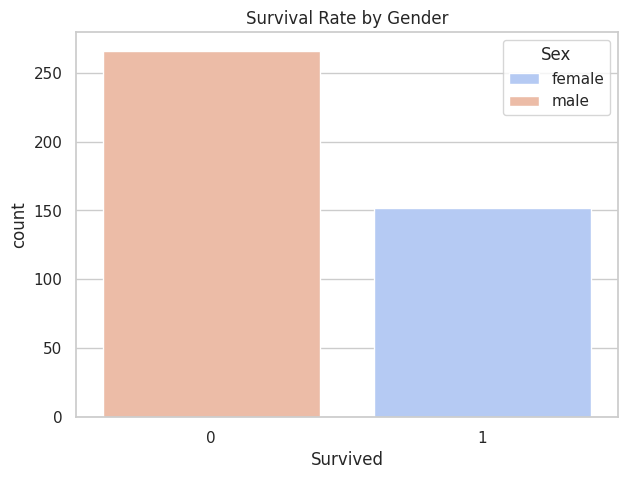

In [38]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Survived', hue='Sex', data=df, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.show()

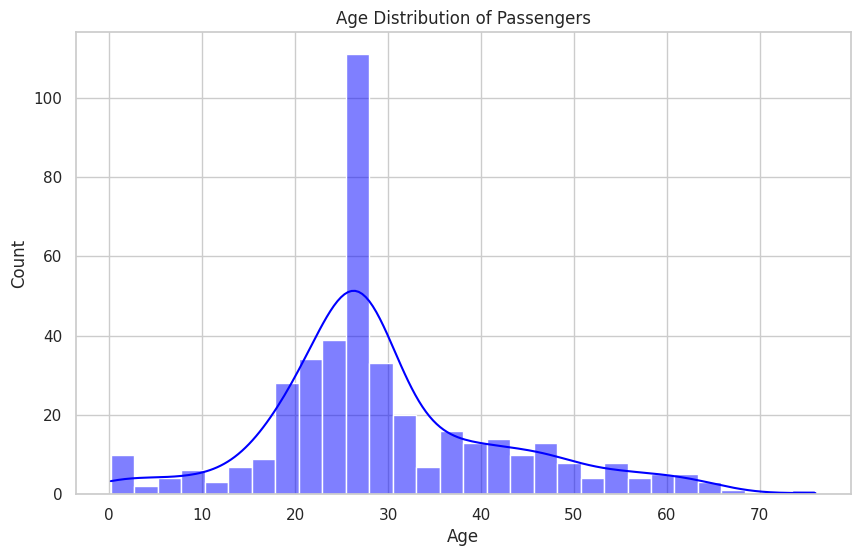

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='blue', bins=30)
plt.title('Age Distribution of Passengers')
plt.show()

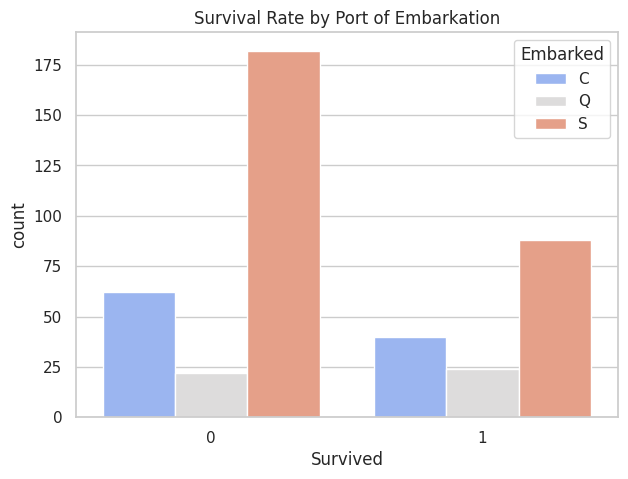

In [41]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Survived', hue='Embarked', data=df, palette='coolwarm')
plt.title('Survival Rate by Port of Embarkation')
plt.show()

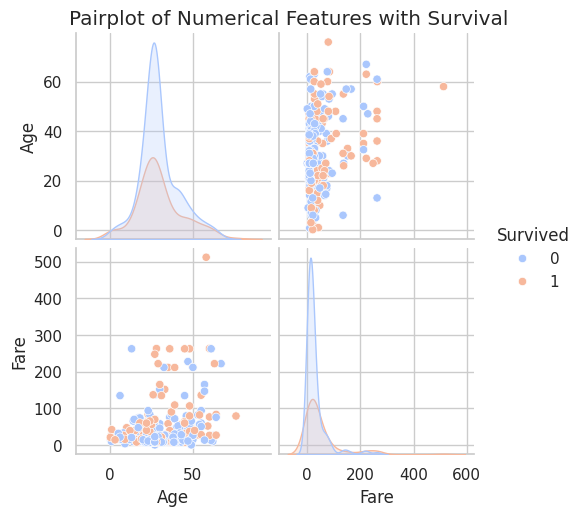

In [42]:
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived', palette='coolwarm')
plt.suptitle('Pairplot of Numerical Features with Survival', y=1.02)
plt.show()

<Axes: >

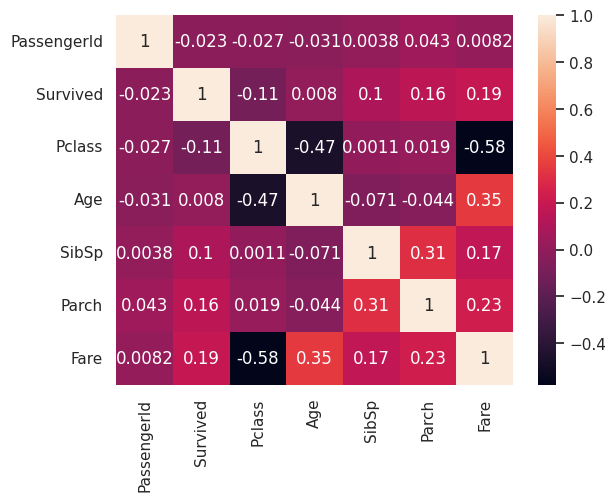

In [43]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

**Machine Learning Algorithm**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [47]:
# Drop irrelevant columns
data_cleaned = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [59]:
# Fill missing values
data_cleaned['Age'].fillna(data_cleaned['Age'].median(), inplace=True)
data_cleaned['Embarked'].fillna(data_cleaned['Embarked'].mode()[0], inplace=True)
data_cleaned['Fare'].fillna(data_cleaned['Fare'].median(), inplace=True)

In [60]:
# Convert categorical variables to numeric using Label Encoding
le_sex = LabelEncoder()
data_cleaned['Sex'] = le_sex.fit_transform(data_cleaned['Sex'])

le_embarked = LabelEncoder()
data_cleaned['Embarked'] = le_embarked.fit_transform(data_cleaned['Embarked'])


In [61]:
# Define features (X) and target (y)
X = data_cleaned.drop('Survived', axis=1)
y = data_cleaned['Survived']

In [62]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [63]:
# Create a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [64]:
# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [65]:
# Predict the outcomes for the test set
y_pred = model.predict(X_test)

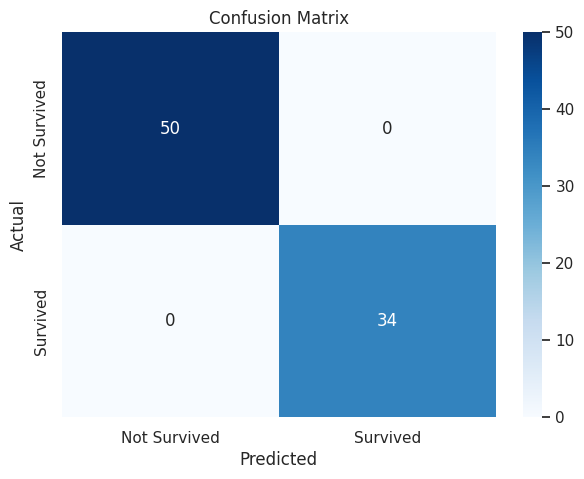

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [70]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [71]:
import streamlit as st

In [82]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


In [83]:
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [84]:
model = pickle.load(open('random_forest_model.pkl', 'rb'))

In [85]:
st.title("Titanic Survival Prediction")

2024-09-18 17:13:02.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 17:13:02.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [86]:
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Gender", ['male', 'female'])
age = st.slider("Age", 1, 100, 25)
sibsp = st.slider("Siblings/Spouses Aboard", 0, 8, 0)
parch = st.slider("Parents/Children Aboard", 0, 6, 0)
fare = st.number_input("Fare", 0.0, 500.0, 32.0)
embarked = st.selectbox("Port of Embarkation", ['Cherbourg', 'Queenstown', 'Southampton'])


2024-09-18 17:13:04.702 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 17:13:04.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 17:13:04.706 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 17:13:04.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 17:13:04.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 17:13:04.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 17:13:04.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 17:13:04.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [87]:
sex = 1 if sex == 'male' else 0
embarked = {'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2}[embarked]


In [88]:
input_data = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])


In [89]:
prediction = np.random.choice([0, 1])  # 0: Not Survived, 1: Survived

# Display result
if st.button('Predict'):
    if prediction == 1:
        st.success('The passenger would survive.')
    else:
        st.error('The passenger would not survive.')

2024-09-18 17:13:10.857 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 17:13:10.859 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 17:13:10.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-18 17:13:10.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


# To Run Model run following command on command Prompt

streamlit run titanic_app.ipynb
